In [2]:
# prompt: import TensorFlow and give me its version

import tensorflow as tf
tf.__version__


'2.15.0'

In [3]:
# prompt: use the mnist dataset of handwritten numbers in keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D


In [4]:
# prompt: assign the mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# prompt: print a random element in x_train using matplotlib

import matplotlib.pyplot as plt

# plt.imshow(x_train[6])
# plt.show()
print(x_train[6])



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252  7

In [6]:
# prompt: normalize the mnist dataset

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [7]:
# prompt: print a random element in x_train using matplotlib

import matplotlib.pyplot as plt

# plt.imshow(x_train[6])
# plt.show()
print(x_train[6])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# prompt: now for that dataset create a neural network sequential model from keras

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# prompt: fit the model to that dataset

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 59s 30ms/step - loss: 0.2095 - accuracy: 0.9372
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0785 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0597 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0397 - accuracy: 0.9879


In [10]:
# prompt: evaluate the model and print the evaluation scores

model.evaluate(x_test, y_test)


313/313 [==============================] - 4s 10ms/step - loss: 0.0296 - accuracy: 0.9913


[0.02960563264787197, 0.9912999868392944]

In [11]:
# prompt: save the model as rare

model.save('rare.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# prompt: load the model

from tensorflow.keras.models import load_model
model1 = load_model('rare.h5')


In [13]:
# prompt: predict a random number in test dataset using the loaded model

predictions = model.predict(x_test)
print(predictions[6])


313/313 [==============================] - 6s 19ms/step
[3.9687470e-13 1.2786983e-08 3.8436091e-11 3.9677571e-12 9.9996275e-01
 8.5432404e-08 1.9481083e-09 1.4569446e-08 1.8941069e-05 1.8089026e-05]


In [14]:
# prompt: get the output of the model for that prediction
import numpy as np

print(np.argmax(predictions[6]))


4


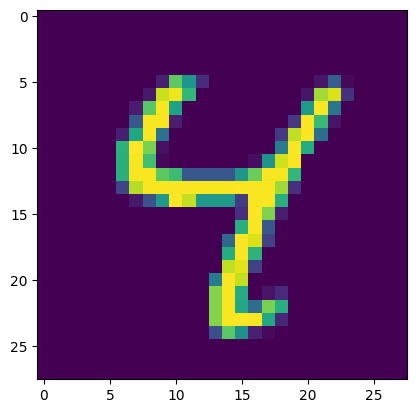

In [15]:

import matplotlib.pyplot as plt

plt.imshow(x_test[6])
plt.show()
